# PCA

В этом блокноте вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:**

#### 1. Минимизируемый функционал

Мы хотим найти двумерное подпространство (вложенного пространства размерности $ l = 2 $) в $ \mathbb{R}^p $, в которое можно спроецировать центрированные данные $ x_i \in \mathbb{R}^p $, $ i = 1, \ldots, n $, так, чтобы искажение было минимальным.

Пусть:
- $ X \in \mathbb{R}^{n \times p} $ — матрица объекты-признаки (объекты по строкам),
- $ W = [w_1, w_2] \in \mathbb{R}^{p \times 2} $ — матрица из ортонормированных векторов: $ w_1^T w_1 = w_2^T w_2 = 1 $, $ w_1^T w_2 = 0 $,
- $ Z \in \mathbb{R}^{n \times 2} $ — матрица новых координат (счетов), где $ z_i = \begin{pmatrix} z_{i1} \\ z_{i2} \end{pmatrix} $ — координаты $ i $-го объекта в новом базисе.

Функция потерь (квадрат нормы Фробениуса ошибки восстановления):

$$
L(W, Z) = \|X - Z W^T\|_F^2 = \sum_{i=1}^n \|x_i - W z_i\|^2
$$

Это эквивалентно минимизации суммы квадратов расстояний от точек $ x_i $ до их проекций на подпространство, натянутое на $ w_1 $ и $ w_2 $.

Цель:  
Найти $ W = [w_1, w_2] $ с ортонормированными столбцами и соответствующую матрицу $ Z $, минимизирующие $ L(W, Z) $.

---

#### 2. Новые координаты — это проекции на $ w_1 $ и $ w_2 $

Пусть $ W = [w_1, w_2] $ — фиксированная ортонормированная матрица. Тогда для каждого $ i $, оптимальный вектор $ z_i \in \mathbb{R}^2 $, минимизирующий $ \|x_i - W z_i\|^2 $, находится из условия:

$$
\frac{\partial}{\partial z_i} \|x_i - W z_i\|^2 = -2 W^T (x_i - W z_i) = 0
\Rightarrow W^T W z_i = W^T x_i
$$

Так как $ W^T W = I_2 $ (из-за ортонормированности столбцов), получаем:

$$
z_i = W^T x_i = \begin{pmatrix} w_1^T x_i \\ w_2^T x_i \end{pmatrix}
$$

То есть:

$$
z_{i1} = w_1^T x_i, \quad z_{i2} = w_2^T x_i
$$

**Вывод:** новые координаты (счеты) — это скалярные произведения (проекции) исходных данных на соответствующие базисные векторы $ w_1 $ и $ w_2 $.

---

#### 3. Векторы $ w_1 $ и $ w_2 $ — собственные векторы ковариационной матрицы

Подставим $ Z = X W $ (поскольку $ z_i = W^T x_i \Rightarrow Z = X W $) в функцию потерь:

$$
L(W) = \|X - Z W^T\|_F^2 = \|X - X W W^T\|_F^2
$$

Используем свойства нормы:

$$
\|X - X W W^T\|_F^2 = \mathrm{Tr}\left( (X - X W W^T)^T (X - X W W^T) \right)
= \mathrm{Tr}(X^T X) - 2 \mathrm{Tr}(W^T X^T X W) + \mathrm{Tr}(W^T X^T X W)
= \mathrm{Tr}(X^T X) - \mathrm{Tr}(W^T X^T X W)
$$

Так как $ \mathrm{Tr}(X^T X) $ не зависит от $ W $, минимизация $ L(W) $ эквивалентна **максимизации**:

$$
\mathrm{Tr}(W^T X^T X W)
$$

Обозначим выборочную ковариационную матрицу:

$$
\Sigma = \frac{1}{n} X^T X
\quad \Rightarrow \quad
\mathrm{Tr}(W^T X^T X W) = n \cdot \mathrm{Tr}(W^T \Sigma W)
$$

Таким образом, задача сводится к:

$$
\max_{W \in \mathbb{R}^{p \times 2},\ W^T W = I_2} \mathrm{Tr}(W^T \Sigma W)
$$

Из спектральной теоремы известно, что этот след максимизируется, когда столбцы $ W $ — собственные векторы $ \Sigma $, соответствующие **двум наибольшим** собственным значениям, взятым в порядке убывания.

Пусть:

- $ \lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_p $ — собственные значения $ \Sigma $,
- $ v_1, v_2, \ldots, v_p $ — соответствующие ортонормированные собственные векторы.

Тогда оптимальное решение:

$$
w_1 = v_1, \quad w_2 = v_2
$$

**Вывод:** первые две главные компоненты — это собственные векторы выборочной ковариационной матрицы $ \Sigma = \frac{1}{n} X^T X $, отвечающие двум наибольшим собственным значениям.

---

#### 4. Статистический смысл собственных значений — дисперсии в новых координатах

Рассмотрим выборочную дисперсию первой главной компоненты (т.е. дисперсию $ z_{i1} = w_1^T x_i $):

$$
\mathrm{Var}(z_1) = \frac{1}{n} \sum_{i=1}^n z_{i1}^2 = \frac{1}{n} \sum_{i=1}^n (w_1^T x_i)^2
= \frac{1}{n} w_1^T \left( \sum_{i=1}^n x_i x_i^T \right) w_1 = w_1^T \left( \frac{1}{n} X^T X \right) w_1 = w_1^T \Sigma w_1
$$

Если $ w_1 $ — собственный вектор $ \Sigma $, отвечающий $ \lambda_1 $, то:

$$
\mathrm{Var}(z_1) = w_1^T (\lambda_1 w_1) = \lambda_1
$$

Аналогично для второй компоненты:

$$
\mathrm{Var}(z_2) = w_2^T \Sigma w_2 = \lambda_2
$$

**Вывод:** собственные значения $ \lambda_1, \lambda_2 $ — это выборочные дисперсии данных вдоль направлений первых двух главных компонент. Таким образом, они отражают объем "объясненной" дисперсии.

---

### Геометрический и статистический смысл

- **Геометрический смысл:**  
  Главные компоненты определяют оси нового ортонормированного базиса в $ \mathbb{R}^p $, вдоль которых данные имеют максимальную вариацию. Первые две компоненты задают плоскость, на которую данные проецируются с минимальной потерей информации.

- **Статистический смысл:**  
  Каждая главная компонента — это направление максимальной дисперсии при условии ортогональности предыдущим. Собственные значения показывают, сколько дисперсии "объясняется" каждой компонентой. Это позволяет выполнять понижение размерности, сохраняя наиболее значимую информацию.

---

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

**Решение:**

В классическом PCA мы работаем с ковариационной матрицей $ X^T X \in \mathbb{R}^{p \times p} $, что удобно при $ n \gg p $. Однако если $ p \gg n $ (много признаков, мало объектов), то матрица $ X^T X $ становится большой и вычислительно тяжелой. В этом случае удобнее работать с **матрицей Грама** $ XX^T \in \mathbb{R}^{n \times n} $, которая значительно меньше.

Покажем, как можно получить главные компоненты через спектральное разложение $ XX^T $, а затем восстановить собственные векторы $ X^T X $ без прямого вычисления этой матрицы.

---

#### 1. Существует ортогональная матрица $ U $, такая что

$$
U^T (XX^T) U = \Lambda
$$

Пусть $ X \in \mathbb{R}^{n \times p} $. Тогда $ XX^T \in \mathbb{R}^{n \times n} $ — симметричная положительно полуопределённая матрица:

$$
(XX^T)^T = XX^T, \quad v^T (XX^T) v = \|X^T v\|^2 \geq 0
$$

Следовательно, по спектральной теореме, существует ортогональная матрица $ U \in \mathbb{R}^{n \times n} $ (столбцы — ортонормированные собственные векторы $ XX^T $), такая что:

$$
XX^T = U \Lambda U^T
\quad \Rightarrow \quad
U^T XX^T U = \Lambda
$$

где $ \Lambda = \mathrm{diag}(\lambda_1, \ldots, \lambda_n) $ — диагональная матрица собственных значений $ XX^T $.

---

#### 2. Равенства: $ XX^T U = U \Lambda $, и связь с $ X^T X $

Из определения собственных векторов:

$$
XX^T U = U \Lambda
$$

Умножим обе части слева на $ X^T $:

$$
X^T (XX^T U) = X^T (U \Lambda)
\quad \Rightarrow \quad
(X^T X)(X^T U) = (X^T U) \Lambda
$$

Обозначим $ V = X^T U \in \mathbb{R}^{p \times n} $. Тогда:

$$
(X^T X) V = V \Lambda
$$

Это означает, что **столбцы матрицы $ V = X^T U $** — собственные векторы матрицы $ X^T X $, соответствующие собственным значениям $ \lambda_i $, при условии $ \lambda_i \neq 0 $.

> Замечание: Если $ \lambda_i = 0 $, то соответствующий вектор $ X^T u_i $ может быть нулевым, и тогда он не является собственным вектором в обычном смысле.

Таким образом, собственные векторы $ X^T X $ можно получить из $ X^T U $, где $ U $ — собственные векторы $ XX^T $.

---

#### 3. Столбцы $ X^T U $ — ортогональны, но не ортонормированы

Рассмотрим $ V = X^T U $. Покажем, что столбцы $ V $ ортогональны.

Пусть $ v_i = X^T u_i $, $ v_j = X^T u_j $. Тогда:

$$
v_i^T v_j = u_i^T X X^T u_j = u_i^T (\lambda_j u_j) = \lambda_j u_i^T u_j
$$

Но $ u_i^T u_j = \delta_{ij} $ (ортонормированность $ U $), значит:

$$
v_i^T v_j =
\begin{cases}
\lambda_i, & i = j \\
0, & i \ne j
\end{cases}
$$

Следовательно, $ V^T V = \Lambda $, т.е. столбцы $ V $ — **ортогональны**, и их квадраты норм равны $ \|v_i\|^2 = \lambda_i $.

Но они **не нормированы**, если $ \lambda_i \ne 1 $.

---

#### 4. Нормировка: получение ортонормированного базиса

Чтобы получить ортонормированные собственные векторы $ X^T X $, нормируем столбцы $ V = X^T U $:

$$
w_i = \frac{v_i}{\|v_i\|} = \frac{X^T u_i}{\sqrt{\lambda_i}}, \quad \text{при } \lambda_i > 0
$$

Тогда $ w_i^T w_j = \delta_{ij} $, и $ w_i $ — ортонормированные собственные векторы $ X^T X $, соответствующие ненулевым собственным значениям.

> Таким образом, мы можем:
> - Вычислить $ U $ и $ \Lambda $ из $ XX^T $ (размер $ n \times n $),
> - Получить собственные векторы $ X^T X $ как $ w_i = \frac{X^T u_i}{\sqrt{\lambda_i}} $,
> - Использовать их как главные компоненты.

Это и есть **аналог PCA**, особенно эффективный при $ n \ll p $.

---

## Практическая часть

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

#### Ответ: **Да, возможно.**

PCA **может эффективно использоваться для подавления шума** в данных при определённых предположениях о структуре сигнала и шума.

---

### Обоснование: почему PCA помогает убрать шум

Представим, что исходные данные $ X \in \mathbb{R}^{n \times p} $ формируются как:

$$
x_i = s_i + \varepsilon_i
$$

где:
- $ s_i $ — "истинный" (сигнал), лежащий в низкоразмерном подпространстве $ \mathbb{R}^d $, $ d \ll p $,
- $ \varepsilon_i $ — случайный шум (например, гауссовский, с нулевым средним), распределённый по всем $ p $ измерениям.

Тогда:
- Полезная структура (сигнал) сосредоточена в **нескольких направлениях** (главных компонентах),
- Шум вносит вклад **равномерно** (или почти равномерно) по всем направлениям, особенно в компоненты с малой дисперсией.

**Ключевая идея PCA при очистке шума:**
> Сохранить первые $ d $ главных компонент (с наибольшими собственными значениями), соответствующие сигналу,  
> а остальные (с малыми дисперсиями) — отбросить, считая их обусловленными шумом.

---

### Конкретный способ: **PCA-фильтрация шума (Noise Filtering via PCA)**

#### Алгоритм:

1. **Центрограм данные:**
   $$
   X_{\text{centered}} = X - \frac{1}{n} \mathbf{1} \mathbf{1}^T X
   $$

2. **Применить PCA:**
   - Найти собственные векторы $ w_1, \dots, w_p $ и значения $ \lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_p $ матрицы $ \frac{1}{n} X^T X $.

3. **Выбрать число компонент $ d $:**
   - По критерию "elbow" на графике дисперсии,
   - Или по порогу объяснённой дисперсии (например, 95%),
   - Или с учётом оценки уровня шума (если известен).

4. **Спроецировать данные на первые $ d $ компонент:**
   $$
   Z_d = X W_d, \quad W_d = [w_1, \dots, w_d] \in \mathbb{R}^{p \times d}
   $$

5. **Восстановить очищенные данные:**
   $$
   \hat{X} = Z_d W_d^T
   $$

   Матрица $ \hat{X} $ — это **аппроксимация $ X $ в $ d $-мерном подпространстве**, свободная от "мелких" вариаций, приписываемых шуму.

---

### Геометрическая и статистическая интерпретация

- **Геометрия:** PCA находит наилучшее $ d $-мерное линейное приближение данных. Шум "растягивает" данные по многим направлениям, но PCA "сжимает" их обратно к истинному многообразию.
- **Статистика:** Дисперсия вдоль главных компонент соответствует мощности сигнала. Шум равномерно повышает дисперсию во всех направлениях, особенно в слабых компонентах. Их отсечение = удаление шума.

---

### Когда это работает хорошо?

| Условие | Объяснение |
|--------|-----------|
| **Сигнал лежит в низкоразмерном подпространстве** | Например, изображения цифр, временные ряды с общей формой |
| **Шум независим и слабо коррелирован** | Гауссовский шум с нулевым средним — идеальный кандидат |
| **Сигнал сильнее шума в первых компонентах** | Тогда $ \lambda_1, \dots, \lambda_d \gg \lambda_{d+1}, \dots $ |

---

### Ограничения

- PCA — **линейный метод**: не поможет, если структура нелинейна.
- Если шум **негауссовский или коррелированный**, может имитировать "сигнал", и PCA ошибётся.
- Слишком сильный шум может "замаскировать" истинные компоненты.
- Неверный выбор $ d $:  
  - $ d $ слишком мал → потеря сигнала,  
  - $ d $ слишком велик → шум остаётся.

---

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


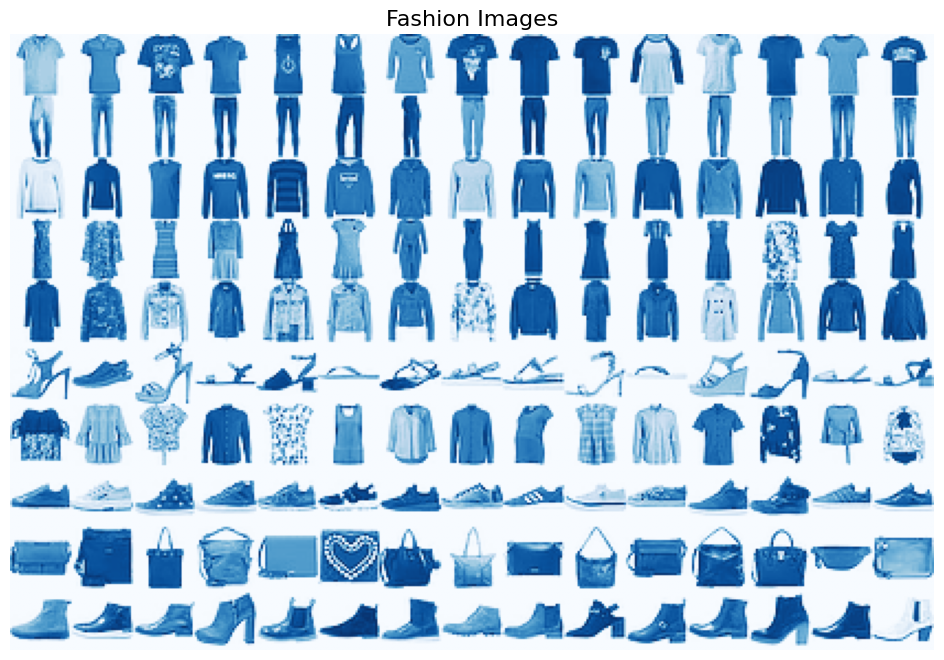

In [ ]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')
plt.show()

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [ ]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

> Примечание: здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [ ]:
# Разделение на train/test с соотношением 80:20 и стратификацией
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42  # для воспроизводимости
)

# Обучение модели логистической регрессии
model = LogisticRegression(
    max_iter=2000,
    tol=0.001,
    random_state=42
)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели с помощью F1-меры (взвешенная)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score (weighted) на тестовых данных: {f1:.4f}")

F1-score (weighted) на тестовых данных: 0.7381


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**

**F1-score** — это **метрика качества бинарной и многоклассовой классификации**, представляющая собой **гармоническое среднее между точностью (precision) и полнотой (recall)**.

#### Формулы:

Для одного класса:

- **Precision (точность):**  
  $$
  \mathrm{Precision} = \frac{TP}{TP + FP}
  $$  
  — доля правильно предсказанных положительных объектов среди всех, предсказанных как положительные.

- **Recall (полнота):**  
  $$
  \mathrm{Recall} = \frac{TP}{TP + FN}
  $$  
  — доля правильно предсказанных положительных объектов среди всех реальных положительных.

- **F1-score:**  
  $$
  \mathrm{F1} = 2 \cdot \frac{\mathrm{Precision} \cdot \mathrm{Recall}}{\mathrm{Precision} + \mathrm{Recall}}
  $$

> F1 равен нулю, если хотя бы одна из компонент (precision или recall) равна нулю.  
> Максимальное значение — 1 (идеальное предсказание), минимальное — 0.

---

### Плюсы F1-меры

| Плюс | Описание |
|------|---------|
| **Учитывает и precision, и recall** | В отличие от accuracy, F1 хорошо работает при дисбалансе классов. |
| **Чувствительна к ложным срабатываниям и пропускам** | Хорош для задач, где оба типа ошибок критичны (например, медицинская диагностика). |
| **Интерпретируема** | Значение от 0 до 1, легко сравнивать модели. |

---

### Минусы F1-меры

| Минус | Описание |
|------|---------|
| **Не учитывает истинно отрицательные (TN)** | F1 строится только на TP, FP, FN — значит, игнорирует TN. Это может быть проблемой, если отрицательные примеры тоже важны. |
| **Не является прямым отражением общей точности модели** | Высокий F1 по одному классу может маскировать плохое поведение по другим. |

---

### Что означает `average='weighted'`?

При **многоклассовой классификации** F1 можно усреднять по классам разными способами. Параметр `average` определяет, **как агрегировать F1 по всем классам**.

#### Варианты параметра `average`:

| Значение | Как работает | Когда использовать |
|--------|-------------|-------------------|
| `None` | Возвращает массив F1 по каждому классу | Для детального анализа, по классам |
| `'micro'` | Считает глобальные TP, FP, FN и один F1 | Когда важна общая производительность, особенно при дисбалансе |
| `'macro'` | Среднее арифметическое F1 по классам (все классы равны) | Когда важна средняя производительность, но классы сбалансированы |
| `'weighted'` | Среднее F1, **взвешенное по числу объектов в каждом классе** | **Рекомендуется при дисбалансе классов** — учитывает размер каждого класса |

### Другие значения `average` — зачем и когда?

| Режим | Формула / логика | Когда использовать |
|------|------------------|--------------------|
| `average='micro'` | Суммирует TP, FP, FN по всем классам, считает один F1 | Когда важно общее число ошибок (например, в поиске) |
| `average='macro'` | $ \frac{1}{K} \sum_{k=1}^K \mathrm{F1}_k $ | Когда все классы одинаково важны, даже если их мало |
| `average='binary'` | Только для бинарной задачи, по одному классу (по умолчанию `pos_label=1`) | В бинарной классификации |

> При дисбалансе:
> - `macro` может быть **занижен**, если модель плохо работает на малых классах,
> - `micro` близок к `accuracy`,
> - `weighted` — **наиболее сбалансированный выбор** для реальных задач.

---

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

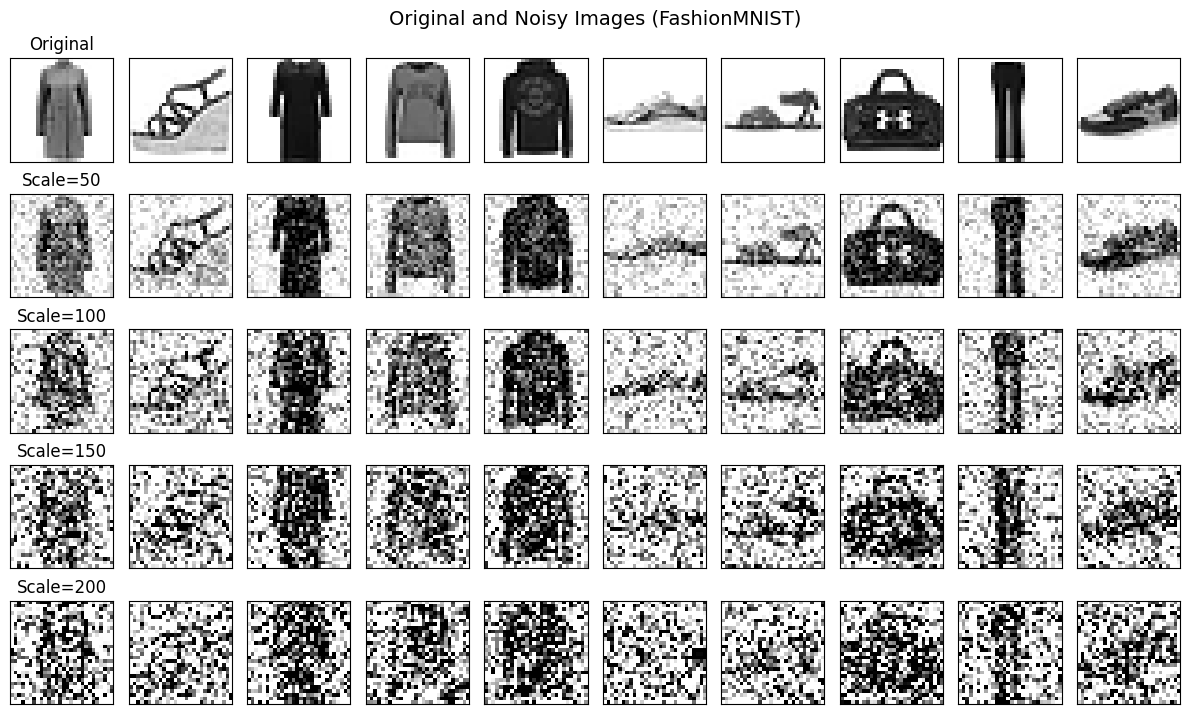

In [ ]:
# Добавляем шум к тестовым данным с разными значениями масштаба
scales = [50, 100, 150, 200]

# Сохраняем зашумленные версии
X_test_noisy_dict = {}

for scale in scales:
    # Генерируем нормальный шум: среднее 0, std = scale / 255
    # Но так как изображения FashionMNIST изначально в [0, 255], а мы их не нормализовали,
    # то шум нужно добавлять с учётом этого диапазона.
    noise = np.random.normal(loc=0, scale=scale, size=X_test.shape)
    X_test_noisy = X_test + noise
    X_test_noisy_dict[scale] = X_test_noisy

# Визуализируем оригинальные и зашумленные изображения
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

# Первый ряд — оригинальные изображения
for i in range(10):
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[0, i].set_title(f'Original') if i == 0 else None

# Последующие ряды — зашумленные с разными scale
for idx, scale in enumerate(scales):
    X_test_noisy = X_test_noisy_dict[scale]
    for i in range(10):
        img = X_test_noisy[i].reshape(28, 28)
        # Ограничиваем значения в [0, 255] для корректного отображения
        img_clipped = np.clip(img, 0, 255)
        axes[idx + 1, i].imshow(img_clipped, cmap=plt.cm.gray_r)
        axes[idx + 1, i].set_title(f'Scale={scale}') if i == 0 else None

plt.tight_layout()
plt.suptitle('Original and Noisy Images (FashionMNIST)', fontsize=14, y=1.02)
plt.show()

**Ваши выводы:**

- **Scale = 50**:  
  Шум заметен, особенно на светлых участках, но **структура объектов сохраняется**. Модель может ещё распознать форму одежды.

- **Scale = 100**:  
  Изображения сильно "забелены", детали размыты, контуры теряются. Распознавание становится затруднительным, особенно для сложных форм (например, обуви).

- **Scale = 150**:  
  Структура почти полностью уничтожена, только общие очертания остаются. Объекты становятся трудно различимыми даже визуально.

- **Scale = 200**:  
  Изображения превращаются в **случайный шум**, с небольшими фрагментами структуры. Невозможно определить, что это за предмет — модель будет работать как "угадывание".

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
# Список уровней шума
scales = [50, 100, 150, 200]

print("F1-score (weighted) на зашумленных данных:")
print("-" * 45)

f1_scores_noisy = {}

for scale in scales:
    X_test_noisy = X_test_noisy_dict[scale]

    # Предсказание на зашумленных данных
    y_pred_noisy = model.predict(X_test_noisy)

    # Оценка качества
    f1 = f1_score(y_test, y_pred_noisy, average='weighted')
    f1_scores_noisy[scale] = f1

    print(f"Scale = {scale:3d}: F1-score = {f1:.4f}")

# Также напечатаем исходный F1 (на чистых данных) для сравнения
y_pred_clean = model.predict(X_test)
f1_clean = f1_score(y_test, y_pred_clean, average='weighted')
print("-" * 45)
print(f"Original (no noise): F1-score = {f1_clean:.4f}")

F1-score (weighted) на зашумленных данных:
---------------------------------------------
Scale =  50: F1-score = 0.5430
Scale = 100: F1-score = 0.3674
Scale = 150: F1-score = 0.2950
Scale = 200: F1-score = 0.2505
---------------------------------------------
Original (no noise): F1-score = 0.7381


**Ваши выводы:** увеличение шума приводит к значительному снижению качества предсказаний.

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

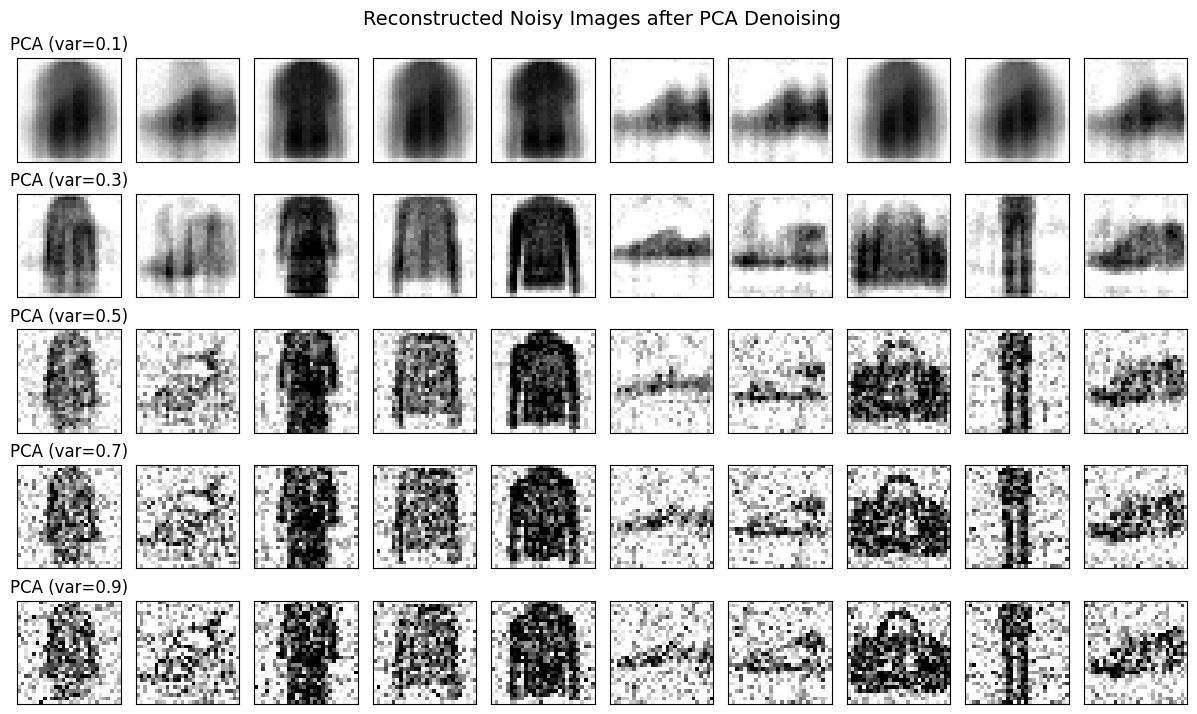

In [ ]:
# Выберем уровень шума (например, scale=100)
scale = 100
X_test_noisy = X_test_noisy_dict[scale]

# Диапазон объяснённой дисперсии
explained_variances = np.arange(0.1, 1.0, 0.1)  # [0.1, 0.2, ..., 0.9]
restored_X_test_noisy_list = []

# Применяем PCA для каждого уровня объяснённой дисперсии
for exp_var in explained_variances:
    pca = PCA(n_components=exp_var)
    X_reduced = pca.fit_transform(X_test_noisy)
    restored = pca.inverse_transform(X_reduced)
    restored_X_test_noisy_list.append(restored)

# Визуализация: строки — уровни дисперсии; столбцы — изображения
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

# Выбираем ключевые уровни: 0.1, 0.3, 0.5, 0.7, 0.9
target_variances = [0.1, 0.3, 0.5, 0.7, 0.9]

for idx, exp_var in enumerate(target_variances):
    # Найдём ближайший индекс в массиве explained_variances
    closest_idx = np.argmin(np.abs(np.array(explained_variances) - exp_var))
    restored = restored_X_test_noisy_list[closest_idx]

    for i in range(10):
        img = restored[i].reshape(28, 28)
        img_clipped = np.clip(img, 0, 255)  # Ограничиваем значения
        axes[idx, i].imshow(img_clipped, cmap=plt.cm.gray_r)
        if i == 0:
            axes[idx, i].set_title(f'PCA (var={exp_var:.1f})')

plt.tight_layout()
plt.suptitle('Reconstructed Noisy Images after PCA Denoising', fontsize=14, y=1.02)
plt.show()

**Ваши выводы:**

| `var` | Характеристики |
|---------------|----------------|
| **0.1** | Очень грубая аппроксимация: изображения размыты, почти не различимы, только общие очертания. |
| **0.3** | Начинают появляться контуры и формы. Шум подавлён, но детали (например, текстура, узоры) отсутствуют. |
| **0.5** | Чёткие очертания объектов, шум значительно уменьшен. Форма одежды хорошо распознаваема, хотя есть артефакты. |
| **0.7** | Детали становятся более чёткими, особенно контуры. Шум почти полностью подавлен, но остаются небольшие искажения. |
| **0.9** | Наиболее близко к оригиналу, но всё ещё видны искажения и "шумовые пятна". Метод начинает "восстанавливать" часть шума как полезный сигнал. |

---

- PCA эффективно **подавляет высокочастотный шум**, который сосредоточен в компонентах с малой дисперсией.
- Полезная информация (форма одежды) лежит в **низкоразмерном подпространстве** — её можно восстановить даже при сильном шуме.
- При увеличении `explained_variance` модель сохраняет больше информации, но также рискует "восстановить" часть шума.
- **Размытие**: изображения выглядят "масляными", потому что PCA работает с линейными комбинациями пикселей, а не с локальными структурами.
- **Потеря деталей**: мелкие элементы (например, шнурки, рисунки) исчезают при низком `var`.
- **Передозировка**: при `var=0.9` восстановленные изображения почти не отличаются от зашумлённых — шум не был удалён, а просто "переупакован".
- Восстановленные изображения **не являются точными копиями** оригиналов, но содержат **основную структуру сигнала**. Это подтверждает, что PCA — это **аппроксимация**, а не восстановление.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
# Выберем уровень шума, который хотим "почистить"
scale = 100
X_test_noisy = X_test_noisy_dict[scale]

# Попробуем разные уровни объяснённой дисперсии
explained_variances = np.arange(0.1, 1.0, 0.1)
f1_scores_denoised = {}

print("F1-score (weighted) после PCA-очистки данных:")
print("-" * 45)
print(f"{'Var':<10} {'F1-score':<10}")
print("-" * 45)

# Для каждого уровня объяснённой дисперсии
for exp_var in explained_variances:
    # Применяем PCA для удаления шума
    pca = PCA(n_components=exp_var)
    X_test_reduced = pca.fit_transform(X_test_noisy)
    X_test_denoised = pca.inverse_transform(X_test_reduced)

    # Предсказание на "очищенных" данных
    y_pred_denoised = model.predict(X_test_denoised)

    # Оценка качества
    f1 = f1_score(y_test, y_pred_denoised, average='weighted')
    f1_scores_denoised[exp_var] = f1

    print(f"{exp_var:<10.1f} {f1:<10.4f}")

print("-" * 45)
print(f"F1 на чистых данных: {f1_clean:.4f}")
print(f"F1 с шумом 100: {f1_scores_noisy[100]:.4f}")

F1-score (weighted) после PCA-очистки данных:
---------------------------------------------
Var        F1-score  
---------------------------------------------
0.1        0.0754    
0.2        0.4546    
0.3        0.6463    
0.4        0.5653    
0.5        0.5011    
0.6        0.4556    
0.7        0.4268    
0.8        0.4068    
0.9        0.3881    
---------------------------------------------
F1 на чистых данных: 0.7381
F1 с шумом 100: 0.3674


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы).

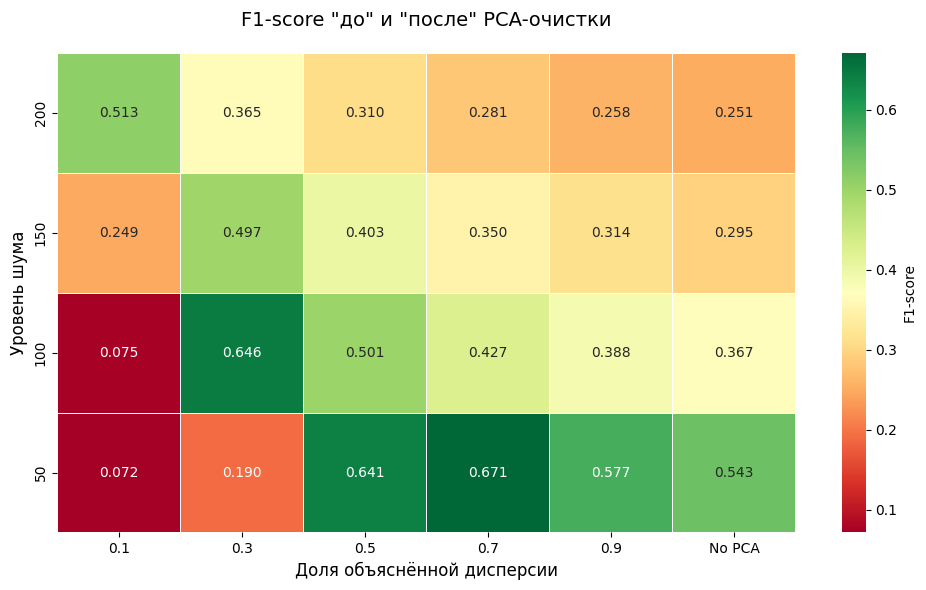

In [ ]:
# Уровни шума
scales = [50, 100, 150, 200]
explained_variances = [0.1, 0.3, 0.5, 0.7, 0.9]

# Словарь для хранения результатов
results = []

# Для каждого уровня шума
for scale in scales:
    X_test_noisy = X_test_noisy_dict[scale]
    f1_noisy = f1_scores_noisy[scale]

    # Для каждой доли объяснённой дисперсии
    for var in explained_variances:
        # Применяем PCA
        pca = PCA(n_components=var)
        X_reduced = pca.fit_transform(X_test_noisy)
        X_denoised = pca.inverse_transform(X_reduced)

        # Предсказание
        y_pred = model.predict(X_denoised)
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Сохраняем
        results.append({
            'Noise Scale': scale,
            'Explained Variance': var,
            'F1-score': round(f1, 4)
        })

# Создаём DataFrame
df = pd.DataFrame(results)
pivot_table = df.pivot(index='Noise Scale', columns='Explained Variance', values='F1-score')
pivot_table['No PCA'] = [f1_scores_noisy[s] for s in scales]


# Визуализация
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_table.sort_index(ascending=False),
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    cbar_kws={'label': 'F1-score'},
    linewidths=0.5,
    square=False
)

plt.title('F1-score "до" и "после" PCA-очистки', fontsize=14, pad=20)
plt.xlabel('Доля объяснённой дисперсии', fontsize=12)
plt.ylabel('Уровень шума', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()